In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('train.csv',index_col='id')

In [3]:
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
id                                                                            
0    I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1    I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2    M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3    F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4    I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

    Shell Weight  Age  
id                     
0       8.348928    9  
1       3.401940    8  
2       6.662133    9  
3      14.996885   11  
4       5.953395    8

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [5]:
df.Sex = df.Sex.astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             74051 non-null  category
 1   Length          74051 non-null  float64 
 2   Diameter        74051 non-null  float64 
 3   Height          74051 non-null  float64 
 4   Weight          74051 non-null  float64 
 5   Shucked Weight  74051 non-null  float64 
 6   Viscera Weight  74051 non-null  float64 
 7   Shell Weight    74051 non-null  float64 
 8   Age             74051 non-null  int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 5.2 MB


# Target Distribution

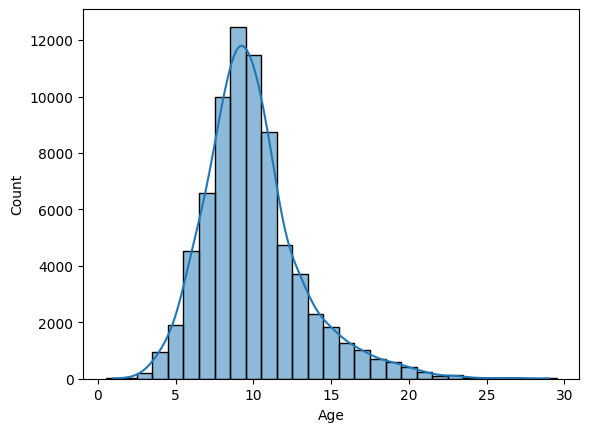

In [7]:
sns.histplot(data=df, x="Age", kde=True,discrete=True,kde_kws={'bw_adjust':2})
plt.show()

In [8]:
df.Age.mean()

9.967805971560141

In [9]:
df.Age.median()

10.0

# Feature Distribution

In [10]:
features = df.drop('Age',axis=1)

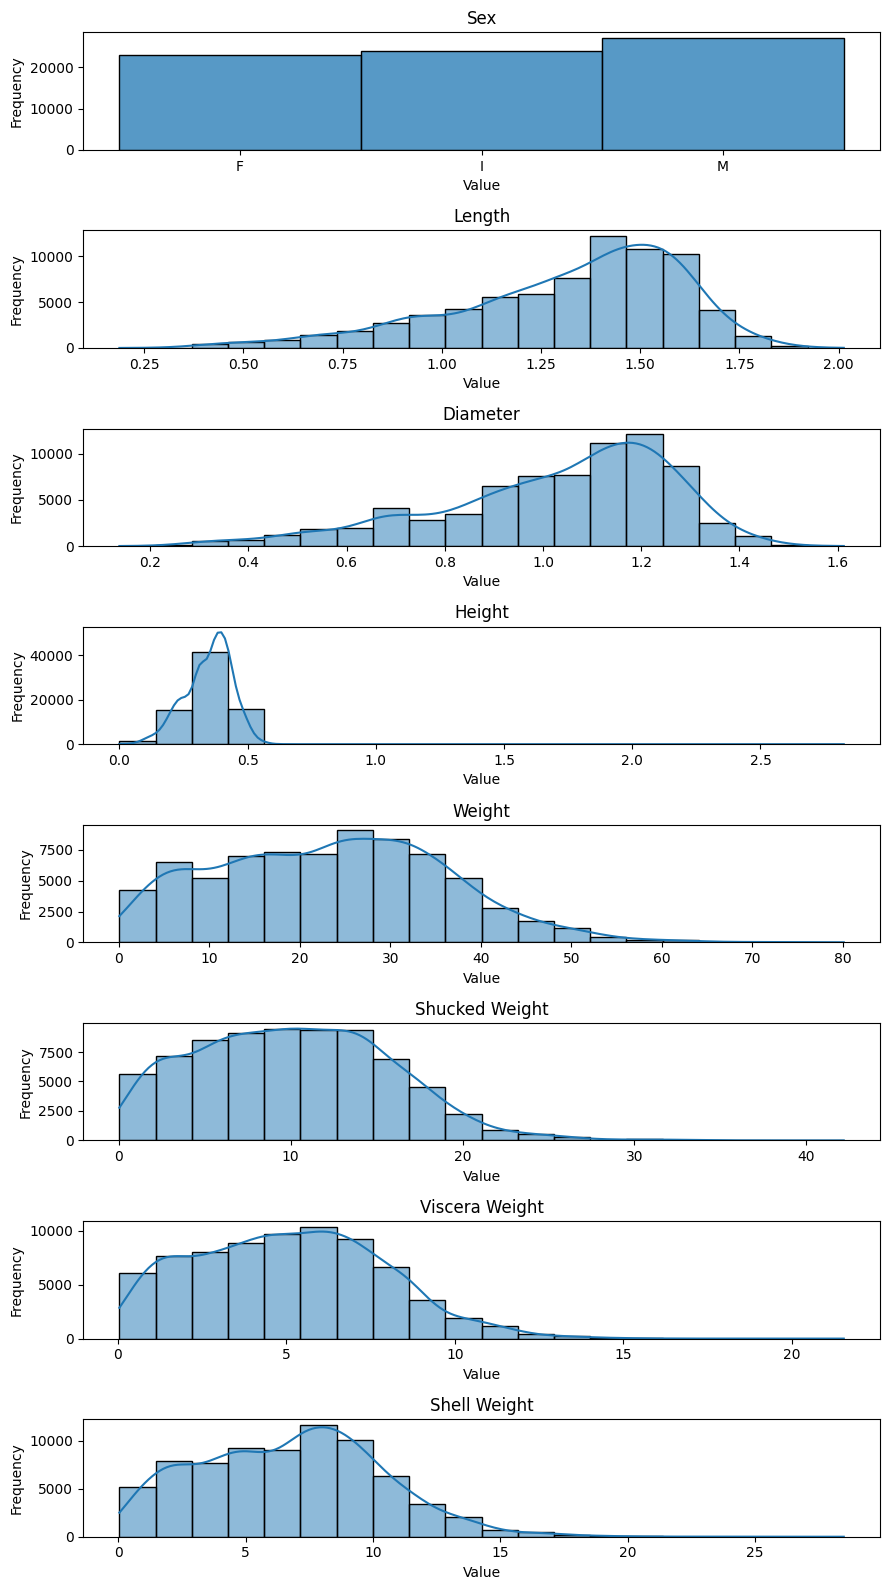

In [11]:
fig, axs = plt.subplots(features.columns.shape[0],figsize=(9,16))
for id, f in enumerate(features.columns) :
    if f != 'Sex':
        range_val = features[f].max() - features[f].min()
        bin_size = range_val / 20
        num_bins = round(range_val / bin_size)
        sns.histplot(features,x=f, ax=axs[id], kde=True,kde_kws={'bw_adjust':2}, bins=num_bins)
    else:
        sns.histplot(features,x=f, ax=axs[id], bins=3)
    axs[id].set_title(f)
    axs[id].set_xlabel('Value')
    axs[id].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot features in relation to age

In [12]:
groupbyage = df.groupby(['Age','Sex']).mean(numeric_only=True)
groupbyage.head()

Length  Diameter    Height    Weight  Shucked Weight  \
Age Sex                                                           
1   F         NaN       NaN       NaN       NaN             NaN   
    I    0.584375  0.432031  0.142969  1.959659        0.716711   
    M         NaN       NaN       NaN       NaN             NaN   
2   F         NaN       NaN       NaN       NaN             NaN   
    I    0.622321  0.462500  0.125893  2.326684        0.922371   

         Viscera Weight  Shell Weight  
Age Sex                                
1   F               NaN           NaN  
    I          0.450048      0.582937  
    M               NaN           NaN  
2   F               NaN           NaN  
    I          0.534591      0.677351

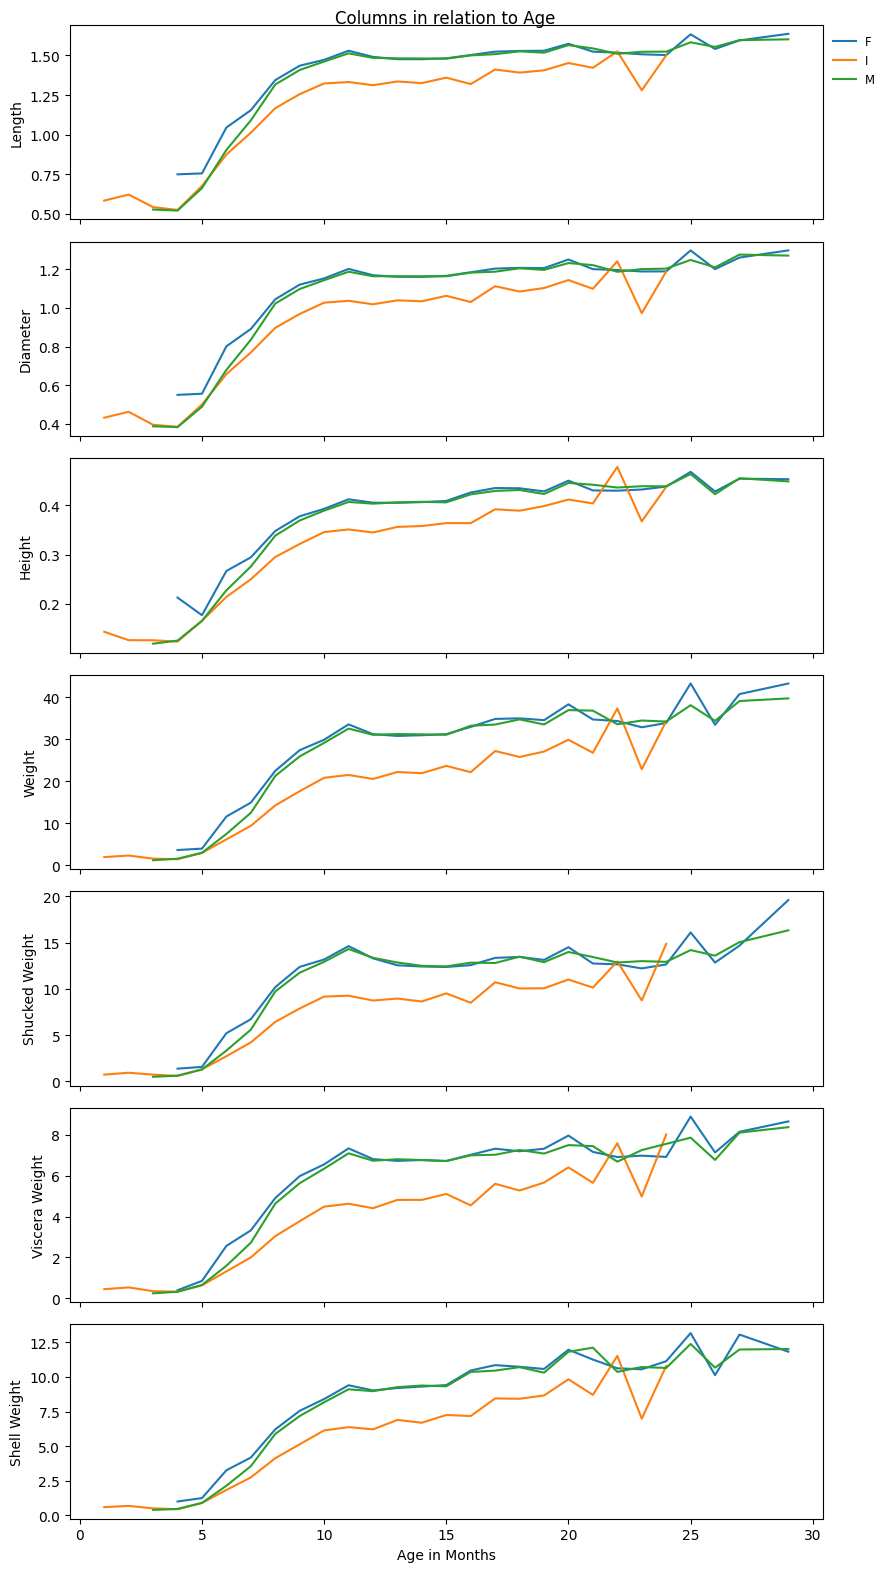

In [13]:
fig, axs = plt.subplots(groupbyage.columns.shape[0],sharex=True,figsize=(9,16))
for id, column in enumerate(groupbyage.columns):
    sns.lineplot(data=groupbyage,x='Age', y=column, hue="Sex",ax=axs[id],legend=(id==0))


axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize='small')
axs[-1].set_xlabel('Age in Months')
plt.suptitle('Columns in relation to Age')
plt.tight_layout()
plt.show()

In [14]:
#sns.pairplot(data=df, hue='Sex',hue_order=['I','M','F'])
#plt.show()

# Age Sex Correlation

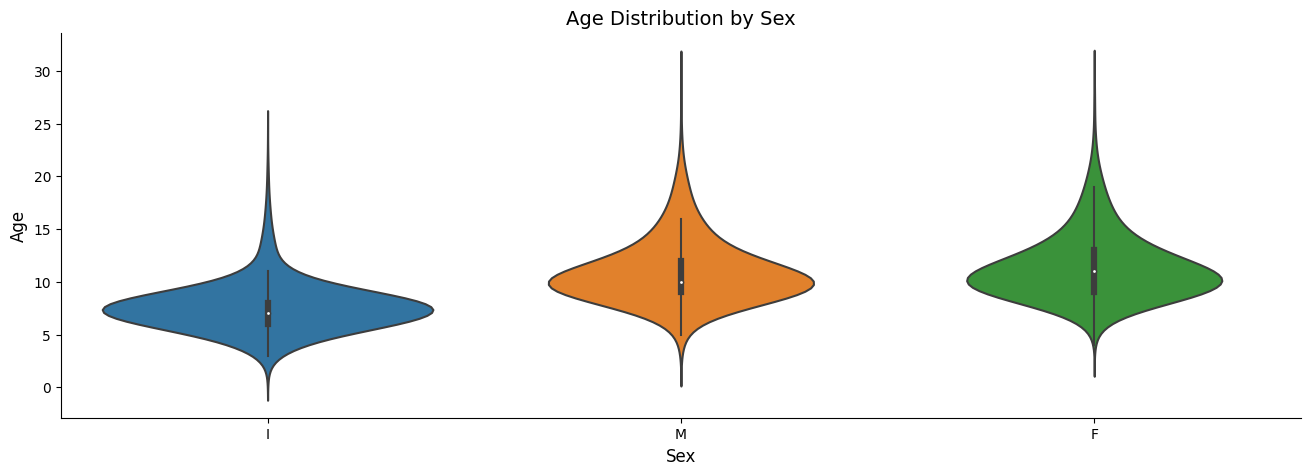

In [15]:
plt.subplots(figsize=(16, 5))
sns.violinplot(x='Sex', y='Age', bw=0.5, data=df,order=['I','M','F'])
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
sns.despine()
fig.tight_layout()
plt.show()

# Correlation Matrix

<AxesSubplot: >

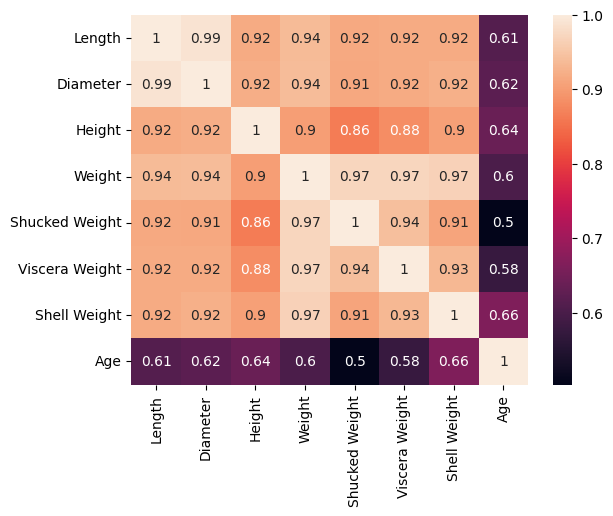

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Incorrect Measurements
####  there are sub weight columns greater than the total weight of the Crab. Part of the body cannot have more weight that the whole body

In [17]:
df[df['Viscera Weight'] > df['Weight']]


Sex  Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
id                                                                             
1996   I  0.1875    0.1375  0.0625  0.056699        0.028349        0.075049   

      Shell Weight  Age  
id                       
1996      0.042524    4

In [18]:
df[df['Shucked Weight']>df['Weight']]

Sex  Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
id                                                                              
2254    I  0.9375    0.7500  0.2250  4.805240        5.003687        1.148155   
2296    I  0.6875    0.5125  0.1750  2.990872       14.033003        0.538640   
10836   I  0.7750    0.5875  0.1750  2.990872       14.033003        0.524466   
11792   I  0.6875    0.5125  0.1875  2.990872       14.033003        0.538640   
14476   M  0.6375    0.4500  0.1750  2.990872       14.033003        0.538640   
15817   I  0.9000    0.6750  0.1875  5.783298        8.632423        1.304077   
22437   I  0.7000    0.5250  0.1875  2.962523       12.076887        0.666213   
27418   I  0.6875    0.5125  0.1750  2.990872       14.033003        0.439417   
28284   I  0.9375    0.6750  0.2125  5.783298        8.150481        1.304077   
30353   I  0.9000    0.6875  0.2125  3.727959        5.740774        0.680388   
32945   I  0.6875    0.5000  0.1750  2.990872       14.033003        0.538640   
34613   I  0.7750    0.5625  0.1750  2.990872       12.332033        0.425243   
37581   F  0.6625    0.5000  0.1750  2.990872       14.033003        0.538640   
42499   I  0.5000    0.3750  0.1250  0.595340        0.708738        0.184272   
45289   I  0.8250    0.6000  0.1750  4.209901       12.048538        0.992232   
45573   I  0.8875    0.6750  0.1875  5.783298        8.632423        1.304077   
48803   I  0.7000    0.5125  0.1750  2.990872       12.332033        0.425243   
50101   I  0.6875    0.5000  0.1750  2.990872       14.132226        0.524466   
52763   I  0.9125    0.7500  0.2000  3.727959        4.011454        1.077281   
55648   I  0.8250    0.6250  0.2250  5.102910       11.736693        1.275727   
56151   I  0.5375    0.4000  0.1375  2.990872       14.033003        0.354369   
58985   I  0.6000    0.4375  0.1625  2.990872       13.338440        0.368544   
61923   I  1.1500    0.8250  0.2500  3.727959        5.740774        2.140387   
65831   I  1.1500    0.9125  0.2500  3.727959        5.740774        2.480581   
69029   I  0.4250    0.2375  0.0875  0.893009        1.077281        0.226796   
70329   I  1.1875    0.9125  0.2500  3.727959        5.740774        2.480581   
71223   I  0.6625    0.5125  0.1750  2.990872       12.332033        1.133980   

       Shell Weight  Age  
id                        
2254       1.417475    6  
2296       0.992232    5  
10836      0.893009    5  
11792      0.893009    5  
14476      0.708738    5  
15817      1.686795    5  
22437      0.850485    6  
27418      0.893009    7  
28284      1.686795    7  
30353      2.267960    6  
32945      0.893009    5  
34613      1.133980    7  
37581      0.992232    7  
42499      0.368544    5  
45289      1.275727    5  
45573      1.686795    6  
48803      0.893009    5  
50101      0.878834    5  
52763      1.502523    6  
55648      1.700970    5  
56151      0.566990    6  
58985      0.566990    3  
61923      3.486988    7  
65831      3.486988    7  
69029      0.269320    5  
70329      3.486988    9  
71223      1.133980    5

In [19]:
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

In [20]:
df[(df == 0).any(axis=1)]

Sex    Length  Diameter  Height    Weight  Shucked Weight  \
id                                                                
762     I  0.787500    0.5750     0.0  3.727959        1.417475   
3585    I  0.737087    0.5250     0.0  2.267960        0.737087   
8749    I  0.525000    0.3750     0.0  2.863300        1.204854   
9320    I  0.462500    0.3250     0.0  0.893009        0.354369   
11542   I  0.637500    0.4375     0.0  1.771844        0.637864   
13456   I  0.575000    0.4000     0.0  1.304077        0.467767   
14406   I  0.737500    0.5375     0.0  3.515338        1.630096   
15463   I  0.500000    0.4000     0.0  1.318252        0.411068   
16301   I  0.437500    0.3625     0.0  1.077281        0.467767   
28362   I  0.387500    0.2625     0.0  0.496116        0.141747   
34250   I  0.787500    0.5750     0.0  3.600386        1.360776   
39272   I  0.600000    0.4375     0.0  1.899417        0.751262   
43915   I  0.662500    0.5000     0.0  2.721552        1.048931   
51660   I  0.400000    0.3000     0.0  0.510291        0.255146   
51907   I  0.537500    0.4125     0.0  1.063106        0.510291   
52362   I  0.687500    0.5125     0.0  2.806601        1.020582   
53477   I  0.825000    0.5625     0.0  5.443104        2.168737   
56641   I  0.475000    0.3250     0.0  0.765436        0.354369   
63366   I  0.625000    0.4375     0.0  1.743494        0.581165   
63685   I  0.400000    0.3125     0.0  0.595340        0.212621   
64501   I  0.575000    0.4375     0.0  1.828543        0.609514   
65901   I  0.925000    0.6875     0.0  6.321938        2.778251   
66724   I  0.725000    0.5375     0.0  3.727959        1.502523   
68906   I  0.587500    0.4375     0.0  1.998640        0.836310   

       Viscera Weight  Shell Weight  Age  
id                                        
762          0.807961      1.133980    4  
3585         0.652038      0.708738    5  
8749         0.425243      0.425243    4  
9320         0.141747      0.269320    7  
11542        0.396893      0.462525    3  
13456        0.340194      0.382718    3  
14406        0.737087      0.878834    2  
15463        0.226796      0.283495    4  
16301        0.184272      0.255146    4  
28362        0.099223      0.141747    3  
34250        1.133980      1.133980    9  
39272        0.396893      0.595340    4  
43915        0.637864      0.850485    4  
51660        0.226796      0.141747    4  
51907        0.340194      0.425243    4  
52362        0.524466      0.850485    5  
53477        1.289902      1.842718    6  
56641        0.141747      0.255146    4  
63366        0.269320      0.566990    4  
63685        0.127573      0.141747    4  
64501        0.496116      0.609514    4  
65901        1.063106      2.126212    9  
66724        0.765436      1.162330    3  
68906        0.354369      0.566990    4

# Feature Engineering

In [21]:
def featureEngineering(df):
    df = df.drop(df[(df == 0).any(axis=1)].index)

    # Clean the weights by capping the over weights with total body weights
    df['Shell Weight']=np.where(df['Shell Weight']>df['Weight'],df['Weight'],df['Shell Weight'])
    df['Viscera Weight']=np.where(df['Viscera Weight']>df['Weight'],df['Weight'],df['Viscera Weight'])
    df['Shucked Weight']=np.where(df['Shucked Weight']>df['Weight'],df['Weight'],df['Shucked Weight'])
    
    # Crab Surface area
    df["crab_area"]= df["Length"]*df["Diameter"]
    
    # Crab density approx (weight over volume assume the crab is cilindrical)
    df['approx_density']=df['Weight']/(df['crab_area']*df['Height'])
    
    # Crab BMI
    df['bmi']=df['Weight']/(df['Height']**2)
    
    # Measurement ratios
    df["length_dia_ratio"]=df['Length']/df['Diameter']
    df["length_height_ratio"]=df['Length']/df['Height']
    df['shell_shuck_ratio']=df["Shell Weight"]/df["Shucked Weight"]
    
    
    # Water Loss during experiment
    df["water_loss"]=df["Weight"]-df["Shucked Weight"]-df['Viscera Weight']-df['Shell Weight']
    df["water_loss"]=np.where(df["water_loss"]<0,min(df["Shucked Weight"].min(),df["Viscera Weight"].min(),df["Shell Weight"].min()),df["water_loss"])
    return df

In [22]:
def numericalFeatureTransformations(df):
    num_cols = df.select_dtypes(np.number).columns
    sc = MinMaxScaler()
    for col in num_cols:
        scaled = sc.fit_transform(df[[col]])
        # Log Transformation
        df['log_'+col] = np.log1p(scaled)

        # Square Root Transformation
        df['sqrt_'+col] = np.sqrt(scaled)

        # Box-Cox transformation
        transformer = PowerTransformer(method='box-cox')
        df["bx_cx_" + col] = transformer.fit_transform(scaled+1)

        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        df["y_J_"+col] = transformer.fit_transform(df[[col]])

        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        df["pow_"+col] = transformer.fit_transform(scaled)
        
        # Power transformation, 0.1
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.1)
        transformer = FunctionTransformer(power_transform)
        df["pow2_"+col] = transformer.fit_transform(scaled)

        # log to power transformation
        df["log_sqrt_"+col]=np.log1p(df["sqrt_"+col])

       
    df['PCA'] = PCA(n_components=1).fit_transform(df[num_cols])
    return df


In [23]:
df2 = featureEngineering(df)

In [24]:
df2 = numericalFeatureTransformations(df2)

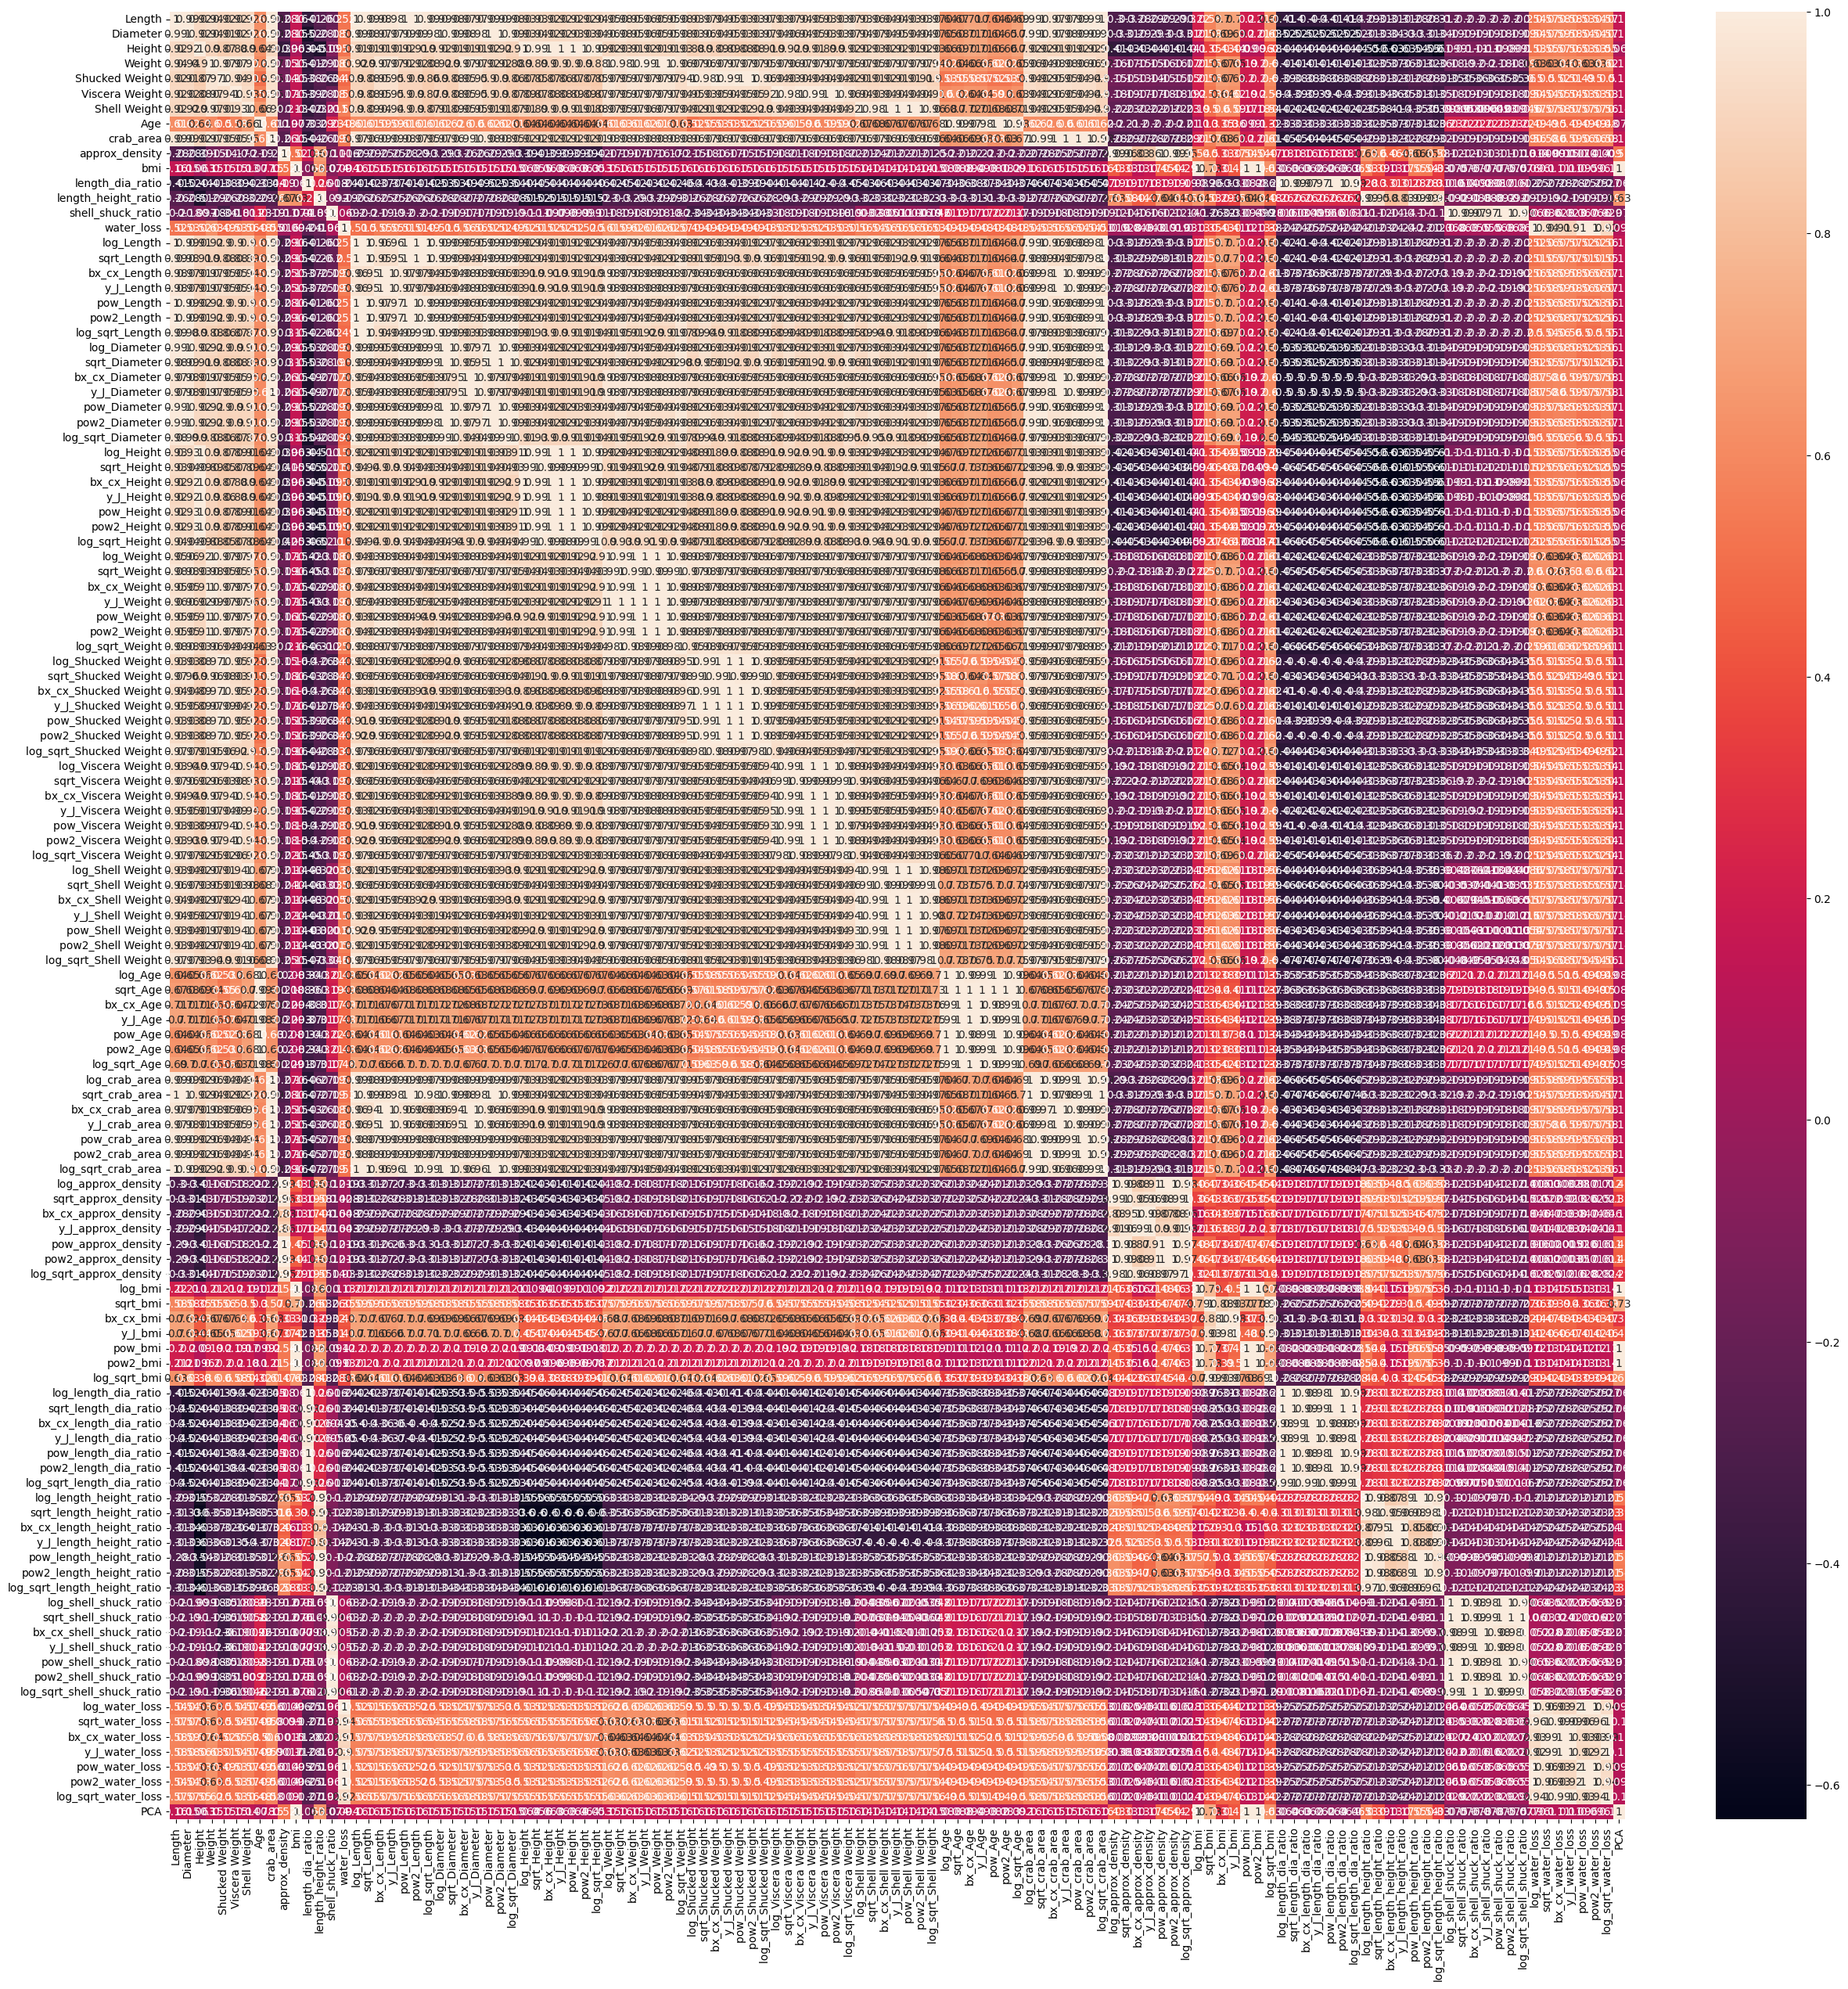

In [25]:
plt.figure(figsize = (30, 30))
sns.heatmap(df2.corr(numeric_only=True),annot=True)
plt.show()